# Decision Trees and Random Forests

**Kyphosis**, or “dowager's hump,” is an unnatural curving of the upper back that creates a hunchback appearance.

**Data Source:** [www.stat.umn.edu/RegGraph/data/Kyphosis.lsp](http://www.stat.umn.edu/RegGraph/data/Kyphosis.lsp)

**Data Dictionary:**

Col 0 = Kyphosis = 1 if present, 0 if absent

Col 1 = Age = months

Col 2 = Num = number of vertebrae

Col 3 = Start = starting vertebrae

## Import Common Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read CSV

In [9]:
df = pd.read_csv('kyphosis.csv')

In [10]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Exploratory Data Analysis

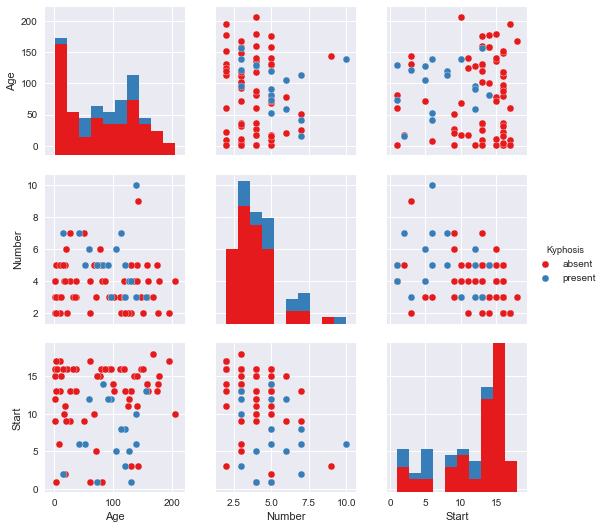

In [11]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.78      0.74      0.76        19
    present       0.29      0.33      0.31         6

avg / total       0.66      0.64      0.65        25



In [21]:
print(confusion_matrix(y_test,predictions))

[[14  5]
 [ 4  2]]


## Tree Visualization

In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

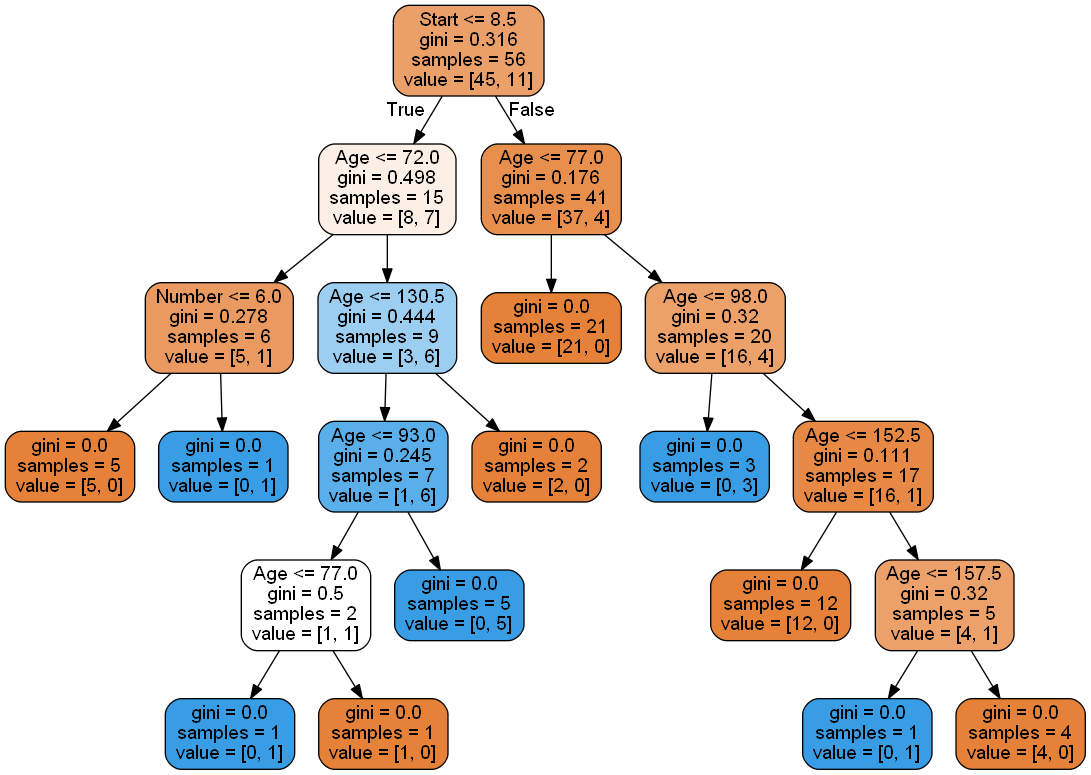

In [23]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


In [27]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25

